# HW-2

[1번] 102. Analyze a Sentence  Write a program that displays the first and last words of a sentence input by the user. Assume that the only punctuation is a period at the end of the sentence.

In [2]:
sentence = input("Enter a sentence: ").split()

print(f"First word: {sentence[0]}")
print(f"Last word: {sentence[-1][0:-1]}")


First word: Reach
Last word: stars


[2번] 104. Name  Write a program that requests a three-part name and then displays the middle name.

In [ ]:
name = input("Enter a 3-part name: ").split()

print(f"Middle name: {name[1]}")

Middle name: Andrew


[3번] 66. Median  The median of an ordered set of measurements is a number separating the lower half from the upper half. If the number of measurements is odd, the median is the middle measurement. If the number of measurements is even, the median is the average of the two middle measurements. Write a program that requests a number n and a set of n measurements (not necessarily ordered) as input and then displays the median of the measurements.

In [10]:
n = int(input("How many number do you want to enter? "))
nums = []

for _ in range(n):
    nums.append(int(input("Enter a number: ")))

nums.sort()

median = None
if n%2 == 0:
    median = (nums[(n//2)-1] + nums[n//2]) / 2
else:
    median = nums[n//2]

print(f"Median: {median}")


Median: 5.5


[4번] 78. Special Number  Write a program to find the four-digit number, call it abcd, whose digits are reversed when the number is multiplied by 4. That is, 4 * abcd = dcba.

In [33]:
ans = []

for abcd in range(1000, 10000):
    dcba = 0
    for i in [1, 10, 100, 1000]:
        dcba += (abcd//i)%10 * (1000//i)

    if (4 * abcd) == dcba:
        ans.append(abcd)

for i in ans:
    print(f"Since 4 times {i} is {4*i},")
    print(f"the special number is {i}.")


Since 4 times 2178 is 8712,
the special number is 2178.


[5번] 26. Count Function  Suppose the count function for a string didn’t exist. Define a function ‘my_str_count’ that returns the number of non-overlapping occurrences of a substring in a string.

In [39]:
def my_str_count(target_str: str, target: str) -> int:
    cnt = 0
    target_str_len = len(target_str)
    target_len     = len(target)

    if target_len == 0:
        return cnt

    for i in range(target_str_len - target_len + 1):
        sub_string = target_str[i : i+target_len]
        if sub_string == target:
            cnt += 1
    
    return cnt

my_str = 'python is popular programming language'

print(f"<Given string> my_str = '{my_str}'")
print(f"my_str_count(my_str, 'p') returns: {my_str_count(my_str, 'p')}")
print(f"my_str_count(my_str, 'la') returns: {my_str_count(my_str, 'la')}")
print(f"my_str_count(my_str, 'hello') returns: {my_str_count(my_str, 'hello')}")


<Given string> my_str = 'python is popular programming language'
my_str_count(my_str, 'p') returns: 4
my_str_count(my_str, 'la') returns: 2
my_str_count(my_str, 'hello') returns: 0


[6번] 30. Pay Raise  Write a pay-raise program that requests a person’s first name, last name, and current annual salary, and then displays the person’s salary for next year. People earning less than $40,000 will receive a 5% raise, and those earning $40,000 or more will receive a raise of $2,000 plus 2% of the amount over $40,000. Define a function to calculate the new salary.

In [122]:
def calc_new_salary(current_salary: int) -> float:
    if current_salary < 40000:
        return current_salary * 1.05
    else:
        return current_salary + (current_salary - 40000) * 0.02 + 2000


first  = input("Enter first name: ")
last   = input("Enter last name: ")
salary = int(input("Enter current salary: "))

print(f"New salary for {first} {last}: ${calc_new_salary(salary):,.2f}")


New salary for John Doe: $50,160.00


[7번] VISUALIZATION  Visit Kaggle (or any other public data repo for machine/deep learning) and download any dataset that can be used for regression. Answer the following questions.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/Admission_Predict.csv")
print(df.shape)
df.head()


(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [116]:
df.isnull().sum()
# 결측치 없음

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

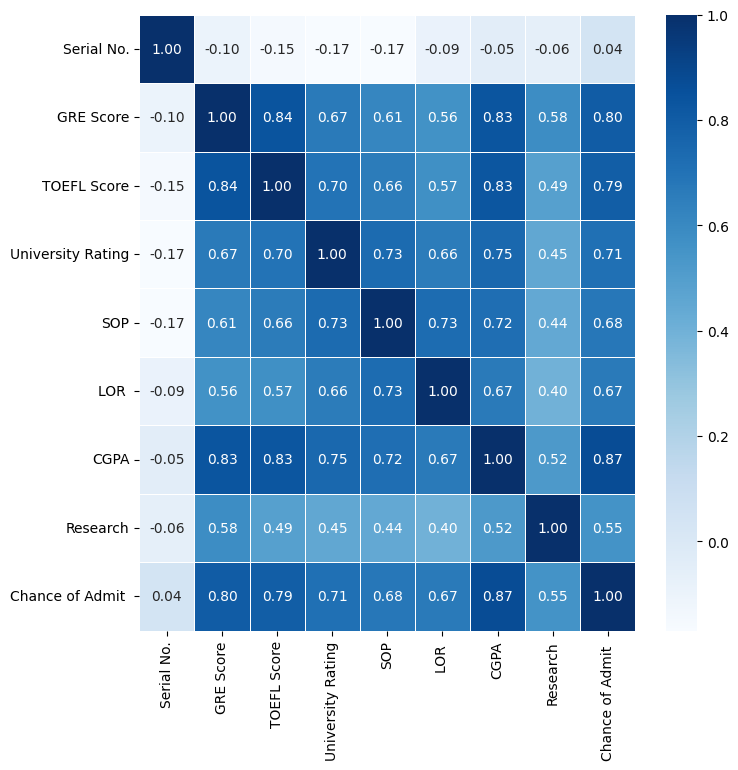

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(
    data = df.corr(),
    annot = True,
    fmt = ".2f",
    linewidths = .5,
    cmap = "Blues"
)

# 합격률(Chance of Admit) 을 예측하려는 결과값으로 하면
# GRE Score와 CGPA 가 가장 높은 상관 관계를 보인다

array([[<Axes: xlabel='GRE Score', ylabel='GRE Score'>,
        <Axes: xlabel='CGPA', ylabel='GRE Score'>,
        <Axes: xlabel='Chance of Admit ', ylabel='GRE Score'>],
       [<Axes: xlabel='GRE Score', ylabel='CGPA'>,
        <Axes: xlabel='CGPA', ylabel='CGPA'>,
        <Axes: xlabel='Chance of Admit ', ylabel='CGPA'>],
       [<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>,
        <Axes: xlabel='CGPA', ylabel='Chance of Admit '>,
        <Axes: xlabel='Chance of Admit ', ylabel='Chance of Admit '>]],
      dtype=object)

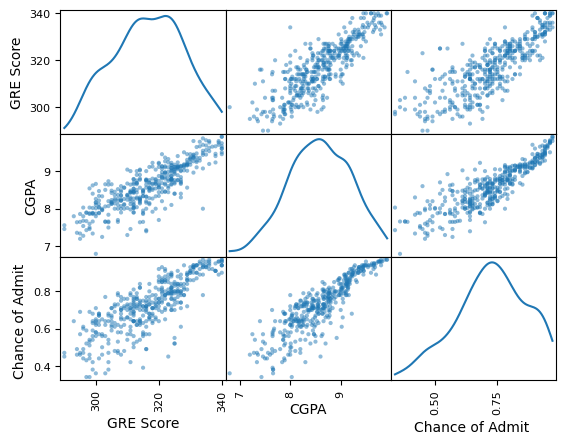

In [ ]:
from pandas.plotting import scatter_matrix
import scipy

chosen_feature = ["GRE Score", "CGPA", "Chance of Admit "]
scatter_matrix(df[chosen_feature], diagonal="kde")
# 두 feature 모두 양의 상관 관계를 보임을 눈으로 확인할 수 있다